# Problem Statement 6.1
Create a table/data frame with the closing prices of 30 different stocks, with 10 from each of the caps

In [1]:
from pylab import plot,show
from numpy import vstack,array
from numpy.random import rand
import numpy as np
from scipy.cluster.vq import kmeans,vq
import pandas as pd
from math import sqrt
from sklearn.cluster import KMeans
from matplotlib import pyplot as plt

gr = pd.DataFrame()
airtel = pd.read_csv('bharti_airtel_stock_data.csv')
gr['Airtel'] = airtel['Close Price']
bhel = pd.read_csv('bhel_stock_data.csv')
gr['Bhel'] = bhel['Close Price']
cadila = pd.read_csv('cadila_stock_data.csv')
gr['Cadila'] = cadila['Close Price']
dlf = pd.read_csv('dlf_stock_data.csv')
gr['DLF'] = dlf['Close Price']
hdfc = pd.read_csv('hdfc_stock_data.csv')
gr['Hdfc'] = hdfc['Close Price']
hdnzinc = pd.read_csv('hdnzinc_stock_data.csv')
gr['hdnzinc'] = hdnzinc['Close Price']
IDEA = pd.read_csv('IDEA_stock_data.csv')
gr['IDEA'] = IDEA['Close Price']
msm = pd.read_csv('msm_stock_data.csv')
gr['Msm'] = msm['Close Price']
piramal = pd.read_csv('piramal_stock_data.csv')
gr['Piramal'] = piramal['Close Price']
ultracemo = pd.read_csv('ultracemo_stock_data.csv')
gr['ultracemo'] = ultracemo['Close Price']
boi = pd.read_csv('boi_stock_data.csv')
gr['Boi'] = boi['Close Price']
dishtv = pd.read_csv('dishtv_stock_data.csv')
gr['Dishtv'] = dishtv['Close Price']
escorts = pd.read_csv('escorts_stock_data.csv')
gr['Escorts'] = escorts['Close Price']
godrej = pd.read_csv('godrej_stock_data.csv')
gr['godrej'] = godrej['Close Price']
gujgas = pd.read_csv('gujgas_stock_data.csv')
gr['Gujgas'] = gujgas['Close Price']
pageinds = pd.read_csv('pageinds_stock_data.csv')
gr['Pageinds'] = pageinds['Close Price']
supreme = pd.read_csv('supreme_stock_data.csv')
gr['Supreme'] = supreme['Close Price']
tatacomm = pd.read_csv('tatacomm_stock_data.csv')
gr['Tatacomm'] = tatacomm['Close Price']
tatglobal = pd.read_csv('tatglobal_stock_data.csv')
gr['Tatglobal'] = tatglobal['Close Price']
ubl = pd.read_csv('ubl_stock_data.csv')
gr['Ubl'] = ubl['Close Price']
cafin = pd.read_csv('canfin_stock_data.csv')
gr['cafin'] = cafin['Close Price']
capacite = pd.read_csv('capacite_stock_data.csv')
gr['Capacite'] = capacite['Close Price']
db_corp = pd.read_csv('db_corp_stock_data.csv')
gr['db_corp'] = db_corp['Close Price']
manapuram = pd.read_csv('manapuram_stock_data.csv')
gr['Manapuram'] = manapuram['Close Price']
program = pd.read_csv('progam_stock_data.csv')
gr['Program'] = program['Close Price']
ramcos = pd.read_csv('ramcos_stock_data.csv')
gr['Ramcos'] = ramcos['Close Price']
sunteck = pd.read_csv('sunteck_stock_data.csv')
gr['Sunteck'] = sunteck['Close Price']
time_techno = pd.read_csv('time_techno_stock_data.csv')
gr['Time_Techno'] = time_techno['Close Price']
welcorp = pd.read_csv('welcorp_stock_data.csv')
gr['Welcorp'] = welcorp['Close Price']
yes_bank = pd.read_csv('yes_bank_stock_data.csv')
gr['Yes_Bank'] = yes_bank['Close Price']
gr['Date'] = bhel['Date']
gr['Date'] = pd.to_datetime(gr['Date'])
gr.set_index('Date',inplace = True)

In [2]:
gr

,Airtel,Bhel,Cadila,DLF,Hdfc,hdnzinc,IDEA,Msm,Piramal,ultracemo,...,cafin,Capacite,db_corp,Manapuram,Program,Ramcos,Sunteck,Time_Techno,Welcorp,Yes_Bank
Date,,,,,,,,,,,,,,,,,,,,,
2018-07-16,347.40,65.00,349.75,178.05,459.85,268.55,52.45,283.75,2522.50,3864.00,...,324.20,270.15,275.10,98.90,10104.05,338.05,386.85,130.65,106.55,378.50
2018-07-17,342.55,68.05,360.15,179.95,464.50,269.50,52.45,285.05,2531.40,3895.20,...,331.15,264.65,253.90,99.85,10452.50,335.50,389.40,134.10,106.40,380.80
2018-07-18,336.80,66.55,354.25,170.70,473.90,269.35,50.00,283.85,2560.40,3849.35,...,329.65,260.80,253.70,100.15,10392.85,344.50,388.60,130.70,106.20,383.65
2018-07-19,345.00,66.15,343.55,169.85,471.00,268.90,50.40,282.10,2525.15,3857.25,...,328.05,262.10,266.15,100.10,10337.20,343.85,392.70,126.85,104.65,392.30
2018-07-20,345.40,67.50,347.95,170.40,489.60,265.25,51.15,298.45,2501.95,3871.70,...,325.80,256.40,263.25,100.65,10428.95,344.85,388.65,124.55,108.05,386.50
2018-07-23,358.95,69.50,359.45,177.65,482.95,267.70,52.55,293.30,2551.75,4009.65,...,330.90,252.35,262.70,101.75,10527.95,347.10,388.65,125.60,109.75,386.60
2018-07-24,356.80,73.45,372.45,189.10,480.15,272.60,56.40,297.95,107400.00,4136.80,...,345.30,265.15,263.45,103.00,10534.25,360.00,400.35,132.35,115.05,384.35
2018-07-25,352.30,71.65,364.95,183.50,494.35,281.85,54.90,299.20,2721.40,4044.85,...,355.70,261.20,267.35,101.65,10560.90,358.45,400.00,136.80,111.75,382.90
2018-07-26,357.65,70.70,371.10,190.20,489.40,272.10,56.80,309.05,2700.05,4142.80,...,352.70,259.80,258.05,103.50,10566.05,361.20,405.15,136.95,127.80,369.75


# Problem Statement 6.2
Calculate average annual percentage return and volatility of all 30 stocks over a theoretical one year period

In [3]:
#Calculate average annual percentage return and volatilities over a theoretical one year period
gr = gr.dropna()
returns = gr.pct_change().mean() * 252
returns = pd.DataFrame(returns)
returns.columns = ['Returns']
returns['Volatility'] = gr.pct_change().std() * sqrt(252)
returns

,Returns,Volatility
Airtel,0.091128,0.364091
Bhel,0.061414,0.383614
Cadila,-0.347095,0.312668
DLF,0.149078,0.453534
Hdfc,0.102871,0.265441
hdnzinc,-0.138794,0.248340
IDEA,-1.314304,0.644506
Msm,-0.757928,0.514570
Piramal,2340.595623,270.736837
ultracemo,0.204864,0.277846


# Problem Statement 6.3 
Cluster the 30 stocks according to their mean annual Volatilities and Returns using K-means clustering. Identify the optimum number of clusters using the Elbow curve method

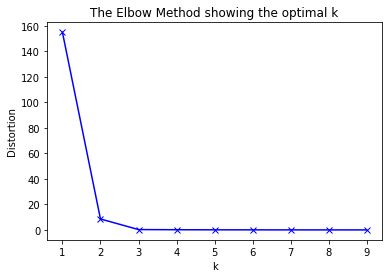

In [4]:
from sklearn.cluster import KMeans
from sklearn import metrics
from scipy.spatial.distance import cdist
import numpy as np
import matplotlib.pyplot as plt

data = np.asarray([np.asarray(returns['Returns']),np.asarray(returns['Volatility'])]).T
X = data
distortions = []
K = range(1,10)
for k in K:
    kmeanModel = KMeans(n_clusters=k).fit(X)
    kmeanModel.fit(X)
    distortions.append(sum(np.min(cdist(X, kmeanModel.cluster_centers_, 'euclidean'), axis=1)) / X.shape[0])

# Plot the elbow
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()
    

# Problem Statement 6.4
Prepare a separate Data frame to show which stocks belong to the same cluster

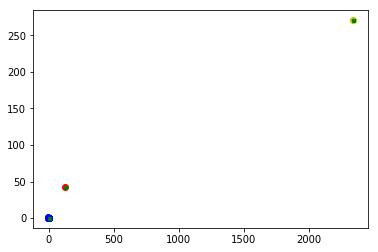

In [5]:
# computing K-Means with K = 3 (3 clusters)
centroids,_ = kmeans(X,3)
# assign each sample to a cluster
idx,_ = vq(data,centroids)
# some plotting using numpy's logical indexing
plot(data[idx==0,0],data[idx==0,1],'ob',
     data[idx==1,0],data[idx==1,1],'oy',
     data[idx==2,0],data[idx==2,1],'or',
     data[idx==3,0],data[idx==3,1],'og',
     data[idx==4,0],data[idx==4,1],'om')
plot(centroids[:,0],centroids[:,1],'sg',markersize=3)

In [6]:
#identify the outlier
print(returns.idxmax())

Returns       Piramal
Volatility    Piramal
dtype: object


In [7]:
#drop the relevant stock from our data
returns.drop('Piramal',inplace=True)
#recreate data to feed into the algorithm
data = np.asarray([np.asarray(returns['Returns']),np.asarray(returns['Volatility'])]).T

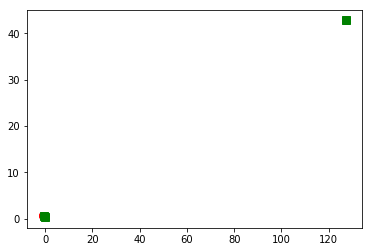

In [8]:
# computing K-Means with K = 3 (3 clusters)
centroids,_ = kmeans(data,3)
# assign each sample to a cluster
idx,_ = vq(data,centroids)
# some plotting using numpy's logical indexing
plot(data[idx==0,0],data[idx==0,1],'ob',
     data[idx==1,0],data[idx==1,1],'oy',
     data[idx==2,0],data[idx==2,1],'or',
     data[idx==3,0],data[idx==3,1],'og',
     data[idx==4,0],data[idx==4,1],'om')
plot(centroids[:,0],centroids[:,1],'sg',markersize=8)
show()

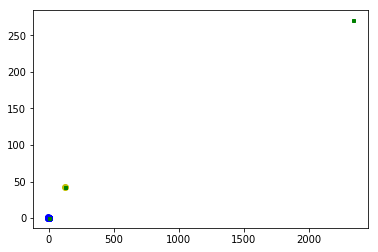

In [9]:
centroids,_ = kmeans(X,3)
# assign each sample to a cluster
idx,_ = vq(data,centroids)
# some plotting using numpy's logical indexing
plot(data[idx==0,0],data[idx==0,1],'ob',
     data[idx==1,0],data[idx==1,1],'oy',
     data[idx==2,0],data[idx==2,1],'or',
     data[idx==3,0],data[idx==3,1],'og',
     data[idx==4,0],data[idx==4,1],'om')
plot(centroids[:,0],centroids[:,1],'sg',markersize=3)

In [10]:
print(returns.idxmax())

Returns       Manapuram
Volatility    Manapuram
dtype: object


In [11]:
returns.drop('Manapuram',inplace=True)
#recreating data
data = np.asarray([np.asarray(returns['Returns']),np.asarray(returns['Volatility'])]).T

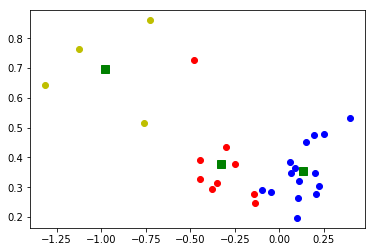

In [12]:
# computing K-Means with K = 3 (3 clusters)
centroids,_ = kmeans(data,3)
# assign each sample to a cluster
idx,_ = vq(data,centroids)
# some plotting using numpy's logical indexing
plot(data[idx==0,0],data[idx==0,1],'ob',
     data[idx==1,0],data[idx==1,1],'oy',
     data[idx==2,0],data[idx==2,1],'or',
     data[idx==3,0],data[idx==3,1],'og',
     data[idx==4,0],data[idx==4,1],'om')
plot(centroids[:,0],centroids[:,1],'sg',markersize=8)
show()

In [13]:
details = [(name,cluster) for name, cluster in zip(returns.index,idx)]
for detail in details:
    print(detail)

('Airtel', 0)
('Bhel', 0)
('Cadila', 2)
('DLF', 0)
('Hdfc', 0)
('hdnzinc', 2)
('IDEA', 1)
('Msm', 1)
('ultracemo', 0)
('Boi', 0)
('Dishtv', 2)
('Escorts', 2)
('godrej', 2)
('Gujgas', 1)
('Pageinds', 2)
('Supreme', 0)
('Tatacomm', 0)
('Tatglobal', 0)
('Ubl', 0)
('cafin', 0)
('Capacite', 0)
('db_corp', 2)
('Program', 0)
('Ramcos', 2)
('Sunteck', 0)
('Time_Techno', 2)
('Welcorp', 0)
('Yes_Bank', 1)
